In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
df=pd.read_csv("german_credit_data.csv")

In [3]:
df.head()

,default,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,0,49,male,1,own,little,NaN,2096,12,education
3,0,45,male,2,free,little,little,7882,42,furniture/equipment
4,1,53,male,2,free,little,little,4870,24,car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
default             1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
from sklearn.model_selection import train_test_split
x_ind=df.drop(labels="default",axis=1)
y_dep=df[["default"]]

In [7]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
# Print Shape of model data

In [9]:
df1=pd.get_dummies(df[["Sex","Housing","Saving accounts","Checking account","Purpose"]])

In [10]:
frames=[df,df1]

In [11]:
df_f=pd.concat(frames,axis=1)

In [12]:
df_f.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
default                        1000 non-null int64
Age                            1000 non-null int64
Sex                            1000 non-null object
Job                            1000 non-null int64
Housing                        1000 non-null object
Saving accounts                817 non-null object
Checking account               606 non-null object
Credit amount                  1000 non-null int64
Duration                       1000 non-null int64
Purpose                        1000 non-null object
Sex_female                     1000 non-null uint8
Sex_male                       1000 non-null uint8
Housing_free                   1000 non-null uint8
Housing_own                    1000 non-null uint8
Housing_rent                   1000 non-null uint8
Saving accounts_little         1000 non-null uint8
Saving accounts_moderate       1000 non-null uint8
Saving accounts_quite ri

### Check for highly correlated variables but don't required any treatment for this use case

In [13]:
df.corr()

,default,Age,Job,Credit amount,Duration
default,1.000000,-0.091127,0.032735,0.154739,0.214927
Age,-0.091127,1.000000,0.015673,0.032716,-0.036136
Job,0.032735,0.015673,1.000000,0.285385,0.210910
Credit amount,0.154739,0.032716,0.285385,1.000000,0.624984
Duration,0.214927,-0.036136,0.210910,0.624984,1.000000


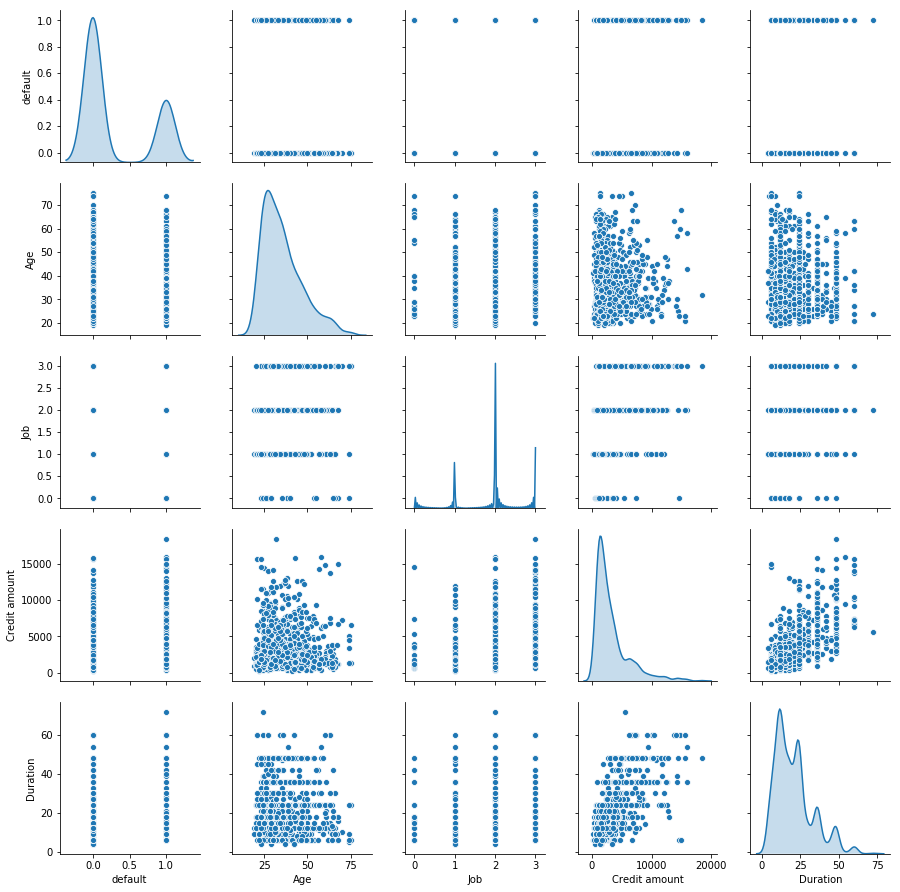

In [14]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

### Drop the original variables which are converted to dummy

In [15]:
df_f=df_f.drop(labels=["Sex","Housing","Saving accounts","Checking account","Purpose"],axis=1)

In [16]:
df_f.to_excel("check1.xlsx")

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [17]:
x_ind=df_f.drop(labels="default",axis=1)
y_dep=df_f[["default"]]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.30)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [19]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier(n_estimators=500,criterion="entropy",max_depth=3,random_state=9999)

In [20]:
Rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [21]:
y_pred=Rf_model.predict(x_test)

In [22]:
from sklearn import metrics
Rf_acc=metrics.accuracy_score(y_test,y_pred)
print(Rf_acc)

0.7433333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [23]:
Rf_cr=metrics.classification_report(y_test , y_pred)
print(Rf_cr)

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       219
           1       0.75      0.07      0.13        81

   micro avg       0.74      0.74      0.74       300
   macro avg       0.75      0.53      0.49       300
weighted avg       0.74      0.74      0.66       300



### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
# Use below values
num_folds = 10
seed = 77

In [26]:
#Validate the Random Forest model build above using k fold

In [33]:
from sklearn import model_selection
models = []
models.append(('RandomForest', Rf_model))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, x_ind, y_dep, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

RandomForest: 0.709000 (0.034554)


In [27]:
#Calculate Mean score

In [ ]:
#Calculate above=70%

In [28]:
# Calculate score standard deviation using std()

In [ ]:
#Done above(0.034554)

# Q8 Print the confusion matrix( 1 Marks)

In [34]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[217   2]
 [ 75   6]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [35]:
Rf_cr=metrics.classification_report(y_test , y_pred)
print(Rf_cr)

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       219
           1       0.75      0.07      0.13        81

   micro avg       0.74      0.74      0.74       300
   macro avg       0.75      0.53      0.49       300
weighted avg       0.74      0.74      0.66       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [29]:
#Hint: Use roc_curve

In [36]:
from sklearn.metrics import roc_curve, auc

Area Under the curve 0.5324708269913749


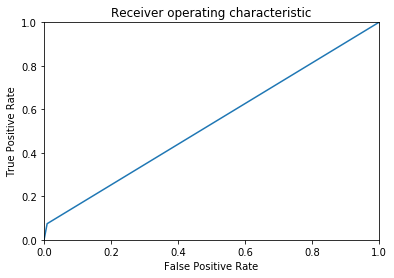

In [37]:
fpr,tpr, _ = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [ ]:
#Done

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [30]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [39]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=Rf_model,n_estimators=51)
bgcl.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [40]:
y_pred2 = bgcl.predict(x_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [41]:
acc=metrics.accuracy_score(y_test,y_pred)
acc*100

74.33333333333333